In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm

MFCC_DIR = Path('MFCC-files/')

In [9]:
df = pd.read_csv(MFCC_DIR / '05-MFCC.csv', header=None)
# df.describe()

In [10]:
COLS = len(df.columns)
print(COLS)
df

21126


,0,1,2,3,4,5,6,7,8,9,...,21116,21117,21118,21119,21120,21121,21122,21123,21124,21125
0,-418.480000,-399.604830,-401.489560,-406.423950,-406.821530,-413.034330,-419.501160,-419.927460,-418.877170,-422.608580,...,-282.661530,-293.030550,-304.229740,-310.689180,-318.925540,-334.785700,-338.854700,-339.807460,-402.001430,-573.060300
1,134.766240,148.524920,149.348630,146.963030,146.482830,141.496350,135.160830,134.342590,134.040800,130.710360,...,200.272230,199.434480,196.301640,194.184600,192.803850,184.488830,171.273640,166.114550,138.119810,0.544603
2,2.626810,-2.128265,3.656887,7.937378,6.562617,6.713026,4.173331,4.530759,2.233318,2.347100,...,-49.089310,-39.403618,-32.885338,-27.509872,-18.930986,-12.149527,-25.312986,-26.683610,-2.232697,0.471878
3,-21.323338,-24.805637,-18.188307,-13.677288,-17.891598,-18.683395,-19.945114,-16.583588,-17.625760,-16.952171,...,-24.159380,-21.127552,-20.965378,-16.215292,-11.266441,-6.490153,-7.905975,-2.723091,-6.217731,0.362574
4,22.312069,28.135742,33.360863,35.179222,28.746410,24.993067,26.291533,30.185385,30.437756,28.760666,...,13.977806,17.079697,18.138044,23.035412,27.830410,31.530022,30.801147,29.799873,21.192066,0.231914
5,29.079994,30.505373,31.813354,33.489456,29.021890,27.412464,31.676105,31.852570,30.072548,27.835285,...,-23.845016,-21.767807,-16.860674,-13.696483,-7.450768,-3.066685,-1.043041,-1.254530,-0.094222,0.096602
6,7.538061,0.071327,-5.581029,-3.859393,-3.790289,0.149469,2.628563,-1.257530,-4.954825,-5.379169,...,-15.510045,-20.365368,-15.268600,-17.164170,-17.115074,-12.844193,-1.730636,2.887880,-6.086455,-0.028466
7,3.851788,-1.027987,-8.483551,-7.910658,-6.260428,0.577138,-0.207632,-6.463700,-8.012026,-9.055458,...,0.720827,-3.489424,0.599557,-0.702163,-3.820158,3.286943,11.641825,9.950672,5.979561,-0.132836
8,5.976318,5.926413,5.278014,6.781340,6.250435,12.238218,13.008579,4.440145,6.153373,2.604114,...,-11.801435,-10.232385,-11.384499,-9.457874,-9.284995,-2.380959,0.180487,-5.170273,-3.664115,-0.211951
9,-4.258420,-5.829715,-2.465994,-0.243907,-1.714005,2.936070,7.396256,-2.003586,-0.426771,-2.292943,...,-17.965963,-14.154795,-17.630442,-17.713196,-15.492861,-11.021458,-8.034616,-11.335018,-13.214830,-0.267085


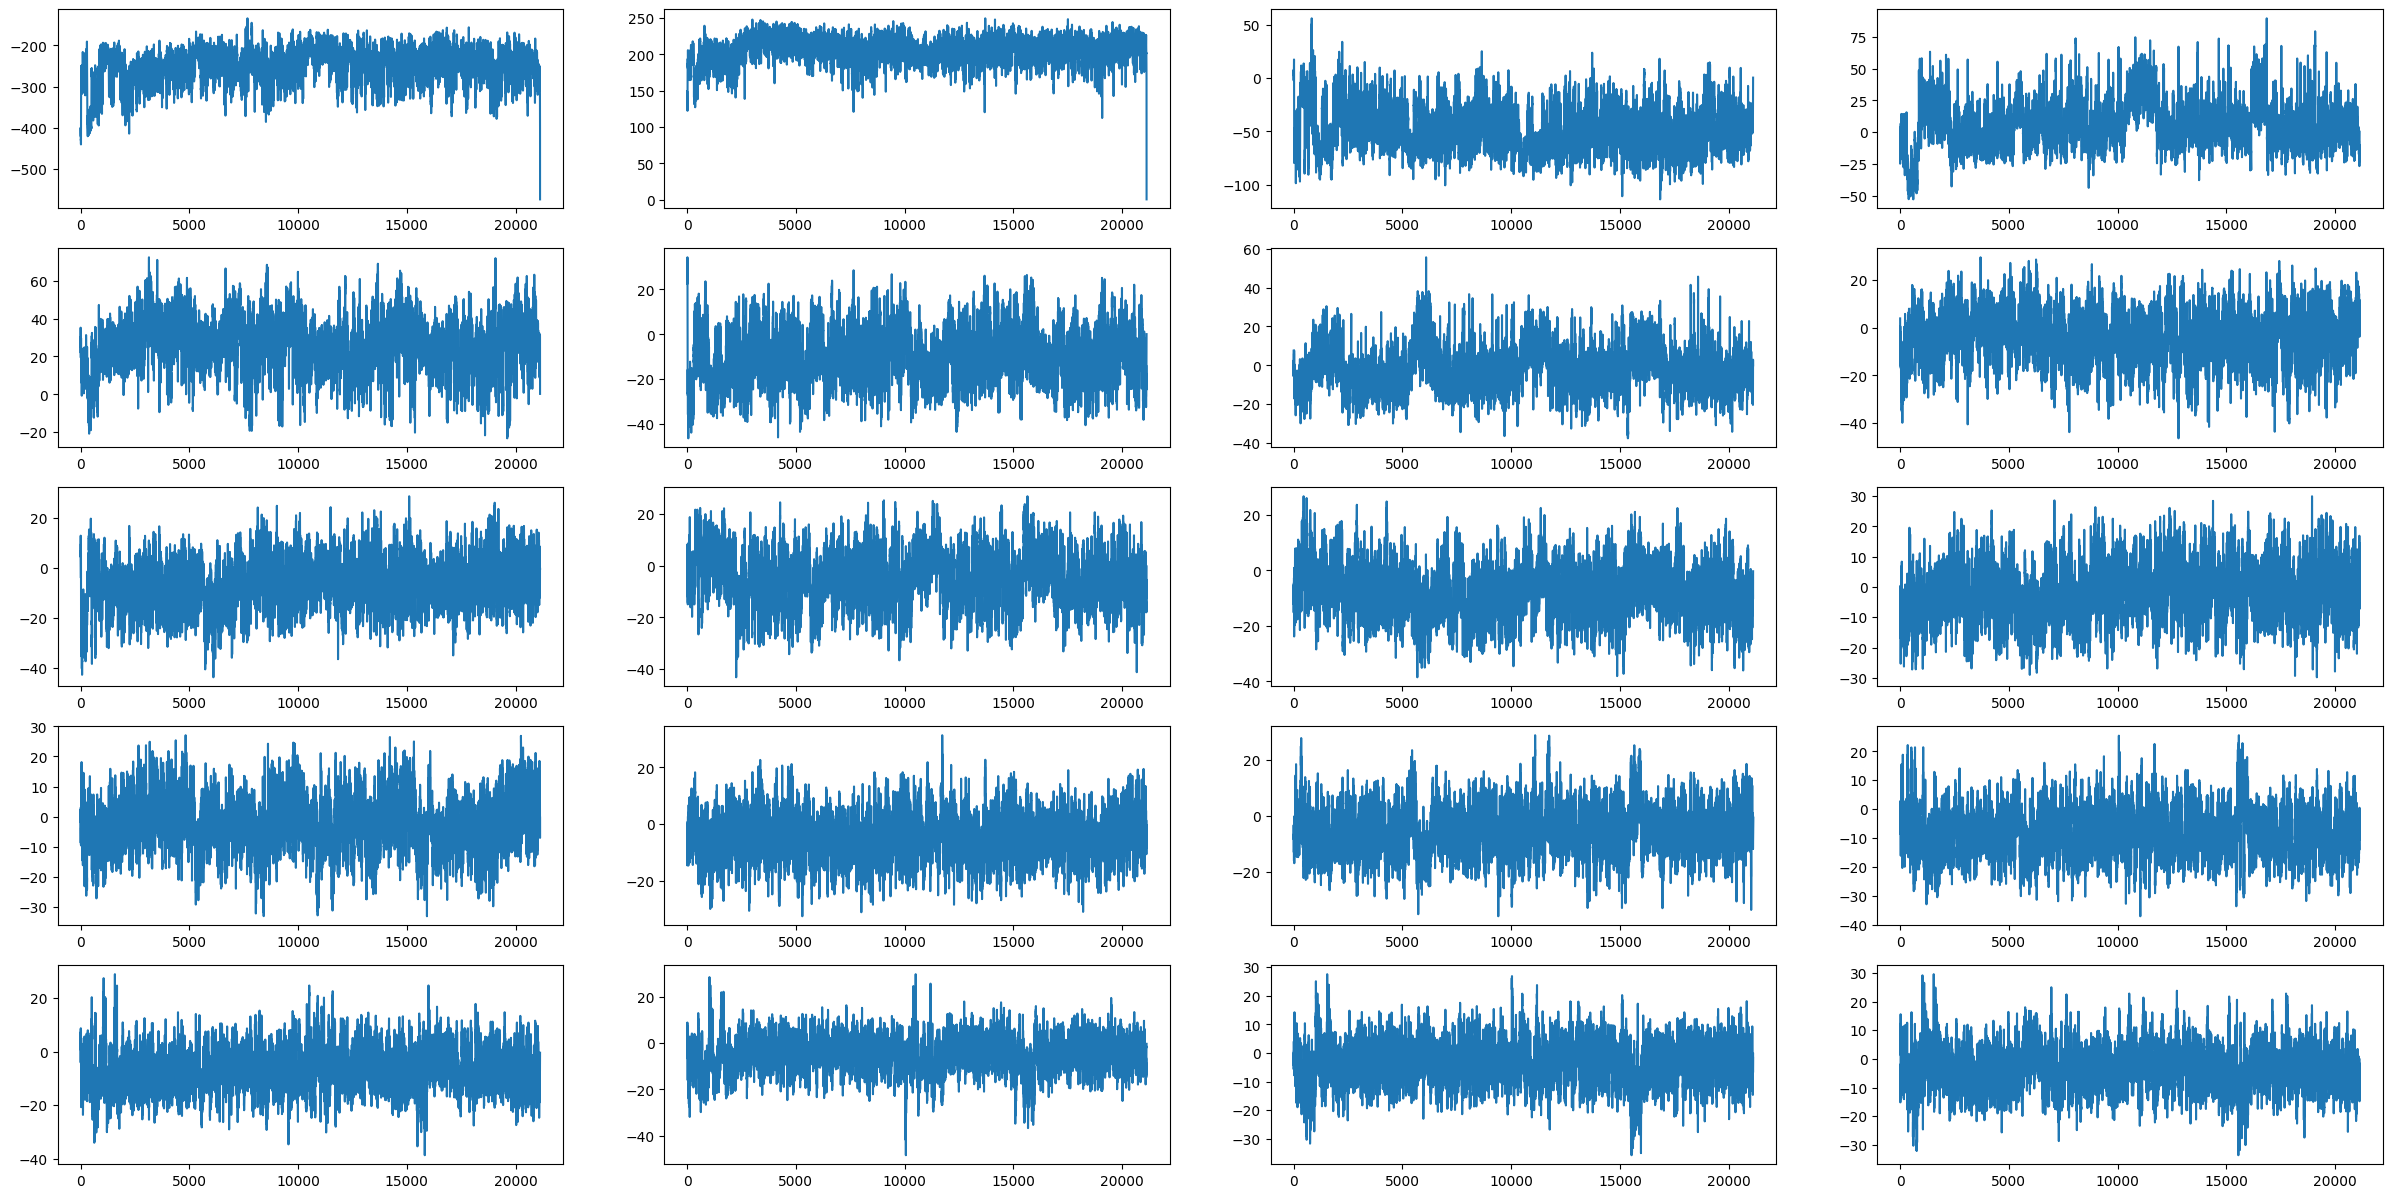

In [15]:
fig = plt.figure(figsize=(30, 15))
for i in range(20):
    plt.subplot(5, 4, i+1)
    plt.plot(df.loc[i])
plt.show()

In [16]:
threshold = 3
window_size = 5

def clean_column(n):
    mean = df[f'c{n}'].mean()
    std = df[f'c{n}'].std()
    
    if std == 0:
        df[f'c{n}_z_score'] = np.zeros(len(df)) 
    else:
        df[f'c{n}_z_score'] = (df[f'c{n}'] - mean) / std

    cleaned_moving_avg = []
    without_outliers = []
    for i in range(len(df)):
        if np.abs(df[f'c{n}_z_score'][i]) > threshold:
            cleaned_moving_avg.append(np.nan)
        else:
            cleaned_moving_avg.append(df[f'c{n}'][i])
            without_outliers.append(df[f'c{n}'][i])

    cleaned_df = pd.DataFrame(cleaned_moving_avg, columns=['cleaned_value'])
    df[f'c{n}_moving_avg'] = cleaned_df['cleaned_value'].rolling(window=window_size, center=True).mean()

    cleaned_column = []
    for i in range(len(df)):
        if np.abs(df[f'c{n}_z_score'][i]) > threshold:
            # print(i, df[f'c{n}_z_score'][i])
            if i < window_size:
                cleaned_column.append(np.mean(without_outliers) if without_outliers else np.nan)
            else:
                cleaned_column.append(df[f'c{n}_moving_avg'][i])
        else:
            cleaned_column.append(df[f'c{n}'][i])

    df[f'c{n}_cleaned'] = cleaned_column


In [17]:
clean_column(df.loc[0])

KeyError: 'c0       -418.48000\n1       -399.60483\n2       -401.48956\n3       -406.42395\n4       -406.82153\n           ...    \n21121   -334.78570\n21122   -338.85470\n21123   -339.80746\n21124   -402.00143\n21125   -573.06030\nName: 0, Length: 21126, dtype: float64'